In [1]:
## NLP_Assign_6_Sentiment_Analysis.ipynb

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [4]:
text = open(r'C:\Users\awadh\rammandir1.txt', encoding="utf-8").read()
lower_case = text.lower()
# str.maketrans removes any punctuations 
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
# Using word_tokenize to tokenize sentence into words
tokenized_words = word_tokenize(cleaned_text, "english")

In [7]:
# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [8]:
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [9]:
emotion_list = []
with open(r'C:\Users\awadh\emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in lemma_words:
            emotion_list.append(emotion)

print("People emotions from the text \n", emotion_list, '\n \n')
w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' average', ' hated', ' alone', ' happy', ' esteemed', 'meditative'] 
 

Count of each emotion 
 Counter({' average': 1, ' hated': 1, ' alone': 1, ' happy': 1, ' esteemed': 1, 'meditative': 1})


In [10]:
sia = SentimentIntensityAnalyzer()
print (sia.polarity_scores(cleaned_text))

{'neg': 0.086, 'neu': 0.747, 'pos': 0.168, 'compound': 0.9974}


In [11]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")


     ******Positive Sentiment*******


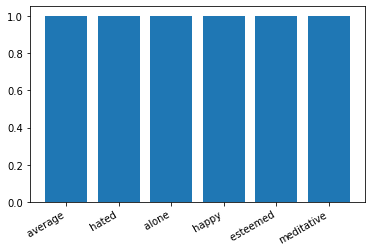

In [12]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()